# Calculations under the MS-SMC' using *ipcoal*

In [1]:
import toytree
import ipcoal
import numpy as np

# print versions
print("ipcoal", ipcoal.__version__)
print("toytree", toytree.__version__)

ipcoal 0.4.dev5
toytree 3.0.1


### Get a genealogy embedded in a species tree
This is the example scenario from the manuscript.

In [10]:
# get species tree, embedded genealogy, and dict mapping gtree tips to sptree pops
SPTREE, GTREE, IMAP = ipcoal.msc.get_test_data()
ipcoal.draw.draw_embedded_genealogy(SPTREE, GTREE, IMAP, container_blend=True);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t206c84e521d8448ea4eee8aebb1c8c91"> idx=5
Ne=1e+05
Tc=1
Tg=2e+05 idx=3
Ne=1e+05
Tc=3
Tg=6e+05 idx=4
Ne=1e+05
Tc=1
Tg=2e+05 idx=2
Ne=1e+05
Tc=2
Tg=4e+05 idx=0
Ne=1e+05
Tc=1
Tg=2e+05 idx=1
Ne=1e+05
Tc=1
Tg=2e+05 idx=6
Ne=1e+05
Tc=0
Tg=0 0 1 2 3 4 5 6 node=0 node=1 node=2 node=7 node=3 node=4 node=8 node=5 node=6 node=9 node=10 node=11 node=12 0 250000 500000 750000

### View genealogy embedding table


In [20]:
# get embedding table
ipcoal.msc.get_genealogy_embedding_table(SPTREE, GTREE, IMAP)

,start,stop,st_node,neff,nedges,dist,gidx,edges
0,0.0,100000.0,0,100000.0,3,100000.0,0,"[0, 1, 2]"
1,100000.0,200000.0,0,100000.0,2,100000.0,0,"[2, 7]"
2,0.0,120000.0,1,100000.0,2,120000.0,0,"[3, 4]"
3,120000.0,200000.0,1,100000.0,1,80000.0,0,[8]
4,0.0,400000.0,2,100000.0,1,400000.0,0,[5]
5,0.0,600000.0,3,100000.0,1,600000.0,0,[6]
6,200000.0,300000.0,4,100000.0,3,100000.0,0,"[2, 7, 8]"
7,300000.0,400000.0,4,100000.0,2,100000.0,0,"[7, 9]"
8,400000.0,450000.0,5,100000.0,3,50000.0,0,"[5, 7, 9]"
9,450000.0,600000.0,5,100000.0,2,150000.0,0,"[5, 10]"


## MS-SMC Calculations
Here we demonstrate each calculation using function calls from the `.smc` module of `ipcoal`. For calculations that require specifying a branch and/or time of recombination, we selected the internal branch (0,1) and a time of half way up the length of this branch.

In [22]:
# get branch that is ancestor of genealogy tips (0, 1)
BRANCH = GTREE.get_mrca_node(0, 1)

# get time that is half way up this branch
TIME = BRANCH.height + (BRANCH.up.height - BRANCH.height) / 2

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [23]:
ipcoal.smc.get_prob_tree_unchanged_given_b_and_tr(SPTREE, GTREE, IMAP, branch=BRANCH.idx, time=TIME)

0.36593062440879776

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [24]:
ipcoal.smc.get_prob_tree_unchanged_given_b(SPTREE, GTREE, IMAP, branch=BRANCH.idx)

0.31536114047325353

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G})$

In [25]:
ipcoal.smc.get_prob_tree_unchanged(SPTREE, GTREE, IMAP)

0.4139694696101504

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [26]:
ipcoal.smc.get_prob_topo_unchanged_given_b_and_tr(SPTREE, GTREE, IMAP, branch=BRANCH.idx, time=TIME)

0.683592936268363

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [27]:
ipcoal.smc.get_prob_topo_unchanged_given_b(SPTREE, GTREE, IMAP, branch=BRANCH.idx)

0.5878937469967593

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G})$

In [28]:
ipcoal.smc.get_prob_topo_unchanged(SPTREE, GTREE, IMAP)

0.6921485857577693

## Expected waiting distances

In [31]:
ipcoal.smc.get_expected_waiting_distance_to_recombination(GTREE, recombination_rate=2e-9)

155.27950310559004

In [33]:
ipcoal.smc.get_expected_waiting_distance_to_tree_change(SPTREE, GTREE, IMAP, recombination_rate=2e-9)

264.9682824584109

In [34]:
ipcoal.smc.get_expected_waiting_distance_to_topo_change(SPTREE, GTREE, IMAP, recombination_rate=2e-9)

504.39756298604965

## Visualize exponential waiting distance distributions

In [41]:
# get waiting distance probability distributions
rvs_r = ipcoal.smc.get_distribution_waiting_distance_to_recombination(GTREE, recombination_rate=2e-9)
rvs_g = ipcoal.smc.get_distribution_waiting_distance_to_tree_change(SPTREE, GTREE, IMAP, recombination_rate=2e-9)
rvs_t = ipcoal.smc.get_distribution_waiting_distance_to_topo_change(SPTREE, GTREE, IMAP, recombination_rate=2e-9)

rvs_r, rvs_g, rvs_t

(<scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fc399d726c0>,
 <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fc399b4ffb0>)

In [42]:
# plot the distributions
ipcoal.smc.plot_waiting_distance_distributions(SPTREE, GTREE, IMAP, recombination_rate=2e-9);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="450.0px" height="300.0px" viewBox="0 0 450.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc9e14f4031b6468882a10bf5fa9e5080"> <path d="M 65.62901386296372 65.0 L 66.54840947024891 71.17598639858195 L 67.4678050775341 77.12760333836701 L 68.38720068481928 82.8630020118598 L 69.30659629210447 88.3900374841883 L 70.22599189938965 93.71627945121335 L 71.14538750667484 98.84902260680369 L 72.06478311396003 103.79529663347438 L 72.98417872124521 108.56187583007227 L 73.9035743285304 113.15528838969395 L 74.82296993581559 117.5818253405433 L 75.74236554310077 121.8475491619734 L 76.66176115038596 125.9583020875138 L 77.58115675767114 129.91971410625376 L 78.50055236495632 133.73721067354126 L 79.41994797224152 137.416020141557 L 80.3393435795267 140.96118091994077 L 81.25873918681188 144.37754837627696 L 82.17813479409708 147.66980148589028 L 83.09753040138224 150.84244924005853 L 84.01692600866744 153.89983682141948 L 84.93632161595264 156.84615155502945 L 85.85571722323782 159.6854286432234 L 86.775112830523 162.42155669213213 L 87.6945084378082 165.0582830374241 L 88.61390404509338 167.5992188765673 L 89.53329965237856 170.0478442146386 L 90.45269525966374 172.40751263045598 L 91.37209086694894 174.68145586956024 L 92.29148647423412 176.87278827033586 L 93.2108820815193 178.98451102933527 L 94.13027768880448 181.0195163116455 L 95.04967329608968 182.98059121192875 L 95.96906890337486 184.87042157156054 L 96.88846451066004 186.691595657094 L 97.80786011794522 188.446607705088 L 98.7272557252304 190.13786133815404 L 99.6466513325156 191.76767285690028 L 100.56604693980078 193.3382744122816 L 101.48544254708597 194.85181706270043 L 102.40483815437116 196.31037372004482 L 103.32423376165633 197.71594198869903 L 104.24362936894153 199.07044690141515 L 105.16302497622672 200.37574355579153 L 106.0824205835119 201.6336196549706 L 107.00181619079709 202.84579795603423 L 107.92121179808227 204.01393862945062 L 108.84060740536745 205.13964153280438 L 109.76000301265265 206.2244484019231 L 110.67939861993783 207.269844962402 L 111.59879422722301 208.27726296441833 L 112.5181898345082 209.24808214362204 L 113.4375854417934 210.18363211078906 L 114.35698104907857 211.08519417282417 L 115.27637665636377 211.95400308760867 L 116.19577226364893 212.7912487550951 L 117.11516787093413 213.5980778469658 L 118.03456347821933 214.37559537708725 L 118.95395908550451 215.12486621491055 L 119.87335469278969 215.84691654389118 L 120.79275030007487 216.54273526692552 L 121.71214590736005 217.2132753607284 L 122.63154151464525 217.8594551810076 L 123.55093712193042 218.4821597202216 L 124.47033272921561 219.0822418196443 L 125.38972833650081 219.66052333739606 L 126.30912394378598 220.21779627404078 L 127.22851955107117 220.75482385729134 L 128.14791515835634 221.27234158730766 L 129.06731076564154 221.77105824402037 L 129.98670637292673 222.251656857859 L 130.9061019802119 222.7147956452138 L 131.82549758749713 223.16110890991357 L 132.7448931947823 223.59120791195278 L 133.6642888020675 224.00568170465883 L 134.58368440935266 224.40509794144535 L 135.50308001663785 224.79000365325675 L 136.42247562392302 225.16092599776886 L 137.34187123120822 225.51837298137136 L 138.26126683849338 225.86283415492122 L 139.18066244577858 226.19478128422 L 140.10005805306378 226.5146689961329 L 141.01945366034897 226.822935401235 L 141.93884926763414 227.12000269383674 L 142.85824487491934 227.4062777302116 L 143.7776404822045 227.68215258581643 L 144.6970360894897 227.94800509226874 L 145.6164316967749 228.2041993548159 L 146.5358273040601 228.4510862510049 

## Visualize probabilities along branches

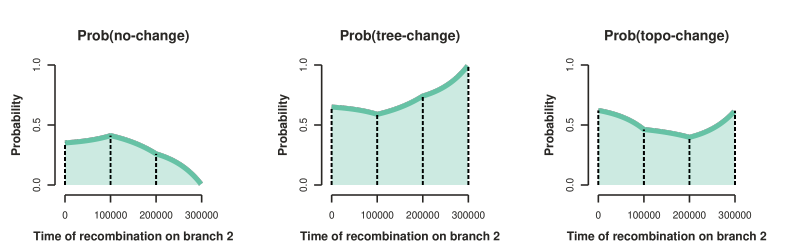

In [44]:
ipcoal.smc.plot_edge_probabilities(SPTREE, GTREE, IMAP, branch=2, stack=0)

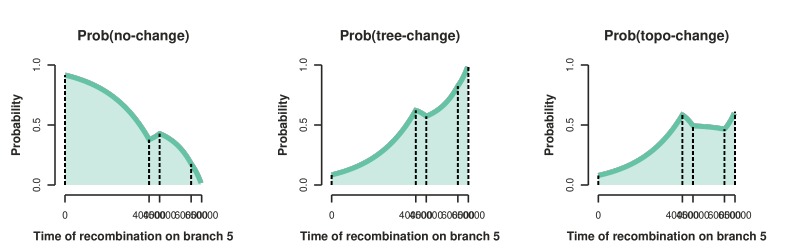

In [45]:
ipcoal.smc.plot_edge_probabilities(SPTREE, GTREE, IMAP, branch=5, stack=0)

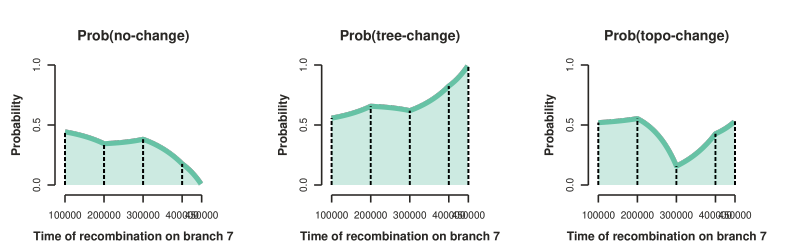

In [48]:
ipcoal.smc.plot_edge_probabilities(SPTREE, GTREE, IMAP, branch=7, stack=0)

## Compare MS-SMC expectations to simulations

In [60]:
# simulate one long chromosome
model = ipcoal.Model(tree=SPTREE, nsamples=4, recomb=2e-9, seed_trees=123, store_tree_sequences=True)
model.sim_trees(nloci=1, nsites=5e5)
print(f"simulated {model.df.shape[0]} tree-change events on a single ARG")

simulated 2898 tree-change events on a single ARG


### Get the OBSERVED mean distance between tree-change events

In [63]:
dists = model.df.nbps
print(f"Observed mean distance between tree-changes in the ARG: {dists.mean():.2f}")

Observed mean distance between tree-changes in the ARG: 172.53


### Get the EXPECTED mean distance between tree-change events
The MS-SMC can calculate an expected distance for any individual genealogy embedded in a species tree. Here we calculate the predicted length of every genealogy in the ARG, given the species tree, and report the mean.

In [65]:
# get waiting distances to topology changes
dists = [
    ipcoal.smc.get_expected_waiting_distance_to_tree_change(
        species_tree=model.tree, genealogy=i, imap=model.get_imap_dict(), recombination_rate=2e-9)
    for i in toytree.mtree(model.df.genealogy)
]
print(f"MS-SMC predicted mean distance between tree-changes: {np.mean(dists):.2f}")

MS-SMC predicted mean distance between tree-changes: 171.74


### View summary of tree sequence
This visual summary shows the first 8 trees and their interval lengths:

In [66]:
# load the tree sequence and plot part of it
tts = toytree.utils.toytree_sequence(model.ts_dict[0], sample=10)
tts.draw_tree_sequence(max_trees=8, width=1000, node_sizes=6, node_colors="black");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="325.0px" viewBox="0 0 1000.0 325.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tbf6b996db49f4a5b9bd1504ecc237d44"> 0 500000 1000000 1500000 <polygon points="50.0,56.61462076174297 57.081545064377686,83.07310380871496 57.081545064377686,215.36551904357484 167.81115879828326,215.36551904357484 167.81115879828326,83.07310380871496 75.6553859143038,56.61462076174297 75.6553859143038,56.61462076174297 167.81115879828326,56.61462076174297 167.81115879828326,56.61462076174297 57.081545064377686,56.61462076174297 57.081545064377686,56.61462076174297 50.0,56.61462076174297" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 0
interval: (0 - 53)
tmrca: 860456.39 <polygon points="75.6553859143038,56.61462076174297 167.81115879828326,83.07310380871496 167.81115879828326,215.36551904357484 278.5407725321889,215.36551904357484 278.5407725321889,83.07310380871496 368.9981003306832,56.61462076174297 368.9981003306832,56.61462076174297 278.5407725321889,56.61462076174297 278.5407725321889,56.61462076174297 167.81115879828326,56.61462076174297 167.81115879828326,56.61462076174297 75.6553859143038,56.61462076174297" style="fill:rgb(98.8%,55.3%,38.4%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 1
interval: (53 - 659)
tmrca: 860456.39 <polygon points="368.9981003306832,56.61462076174297 278.5407725321889,83.07310380871496 278.5407725321889,215.36551904357484 389.27038626609436,215.36551904357484 389.27038626609436,83.07310380871496 418.37261661858855,56.61462076174297 418.37261661858855,56.61462076174297 389.27038626609436,56.61462076174297 389.27038626609436,56.61462076174297 278.5407725321889,56.61462076174297 278.5407725321889,56.61462076174297 368.9981003306832,56.61462076174297" style="fill:rgb(55.3%,62.7%,79.6%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 2
interval: (659 - 761)
tmrca: 860456.39 <polygon points="418.37261661858855,56.61462076174297 389.27038626609436,83.07310380871496 389.27038626609436,215.36551904357484 500.0,215.36551904357484 500.0,83.07310380871496 437.7351720256104,56.61462076174297 437.7351720256104,56.61462076174297 500.0,56.61462076174297 500.0,56.61462076174297 389.27038626609436,56.61462076174297 389.27038626609436,56.61462076174297 418.37261661858855,56.61462076174297" style="fill:rgb(90.6%,54.1%,76.5%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 3
interval: (761 - 801)
tmrca: 860456.39 <polygon points="437.7351720256104,56.61462076174297 500.0,83.07310380871496 500.0,215.36551904357484 610.7296137339056,215.36551904357484 610.7296137339056,83.07310380871496 525.8347991275593,56.61462076174297 525.8347991275593,56.61462076174297 610.7296137339056,56.61462076174297 610.7296137339056,56.61462076174297 500.0,56.61462076174297 500.0,56.61462076174297 437.7351720256104,56.61462076174297" style="fill:rgb(65.1%,84.7%,32.9%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 4
interval: (801 - 983)
tmrca: 860456.39 <polygon points="525.8347991275593,56.61462076174297 610.7296137339056,83.07310380871496 610.7296137339056,215.36551904357484 721.4592274678113,215.36551904357484 721.4592274678113,83.07310380871496 652.1754731583762,56.61462076174297 652.1754731583762,56.61462076174297 721.4592274678113,56.61462076174297 721.4592274678113,56.61462076174297 610.7296137339056,56.61462076174297 610.7296137339056,56.61462076174297 525.8347991275593,56.61462076174297" style="fill:rgb(100%,85.1%,